In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
!pip install geopy

In [34]:
import folium

In [3]:
fire_incidents = pd.read_csv("fire_data.csv")

C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
len(fire_incidents)

1880465

In [8]:
fire_incidents.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [13]:
fire_incidents[(fire_incidents["STATE"]=="TX") & (fire_incidents["FIRE_YEAR"]>=2004) & (fire_incidents["FIRE_YEAR"]<=2015)]

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
283,283,284,289,FS-1419493,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,B,33.786111,-96.150000,5.0,USFS,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x98\x99\x99\x99\x99...
284,284,285,290,FS-1419494,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,C,31.312500,-94.270833,13.0,STATE OR PRIVATE,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x10\xc1QUU\x91W\xc0...
285,285,286,291,FS-1419497,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,B,33.345833,-97.595833,5.0,USFS,TX,NaN,NaN,NaN,"b'\x00\x01\xad\x10\x00\x00\xdc\x8d\x1e""""fX\xc0..."
286,286,287,292,FS-1419498,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,B,31.386667,-95.150556,5.0,USFS,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x94\x9b\xc9\xb3\xa2...
287,287,288,293,FS-1419500,FED,FS-FIRESTAT,FS,USTXTXF,National Forests And Grasslands In Texas,813,...,C,31.354167,-95.085278,5.0,USFS,TX,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x008\x0b\xef0u\xc5W\xc0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856360,1856360,1856361,300289501,SFO-2015TXTXS3689,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,...,C,31.031333,-97.618000,14.0,MISSING/NOT SPECIFIED,TX,Bell,27.0,Bell,b'\x00\x01\xad\x10\x00\x00`;\xdfO\x8dgX\xc0\x0...
1856399,1856399,1856400,300289541,SFO-2015TXTXS3723,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,...,B,32.846100,-94.967600,14.0,MISSING/NOT SPECIFIED,TX,Upshur,459.0,Upshur,b'\x00\x01\xad\x10\x00\x00\x00\xe7\x8c(\xed\xb...
1856439,1856439,1856440,300289582,SFO-2015TXTXS3737,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXTXS,...,A,33.164283,-96.252667,14.0,MISSING/NOT SPECIFIED,TX,Hunt,231.0,Hunt,b'\x00\x01\xad\x10\x00\x00\x18\x1c\xd3\xb0+\x1...
1859961,1859961,1859962,300293785,ICS209_2015_2714938,INTERAGCY,IA-ICS209,ST/C&L,USOKECU,East Central Area Dispatch Office,OKECU,...,D,33.054000,-94.708667,14.0,MISSING/NOT SPECIFIED,TX,Morris County,343.0,Morris,b'\x00\x01\xad\x10\x00\x00\xe8\x10\x93\xcbZ\xa...


In [55]:
fire_incidents['DISCOVERY_DATE'] = pd.to_datetime(fire_incidents['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [51]:
fire_incidents["Date"]=pd.to_datetime(fire_incidents["CONT_DATE"]).dt


array([datetime.date(1970, 1, 1), NaT], dtype=object)

In [57]:
fire_incidents["Month"] = pd.to_datetime(fire_incidents["DISCOVERY_DATE"]).dt.strftime("%B")

In [58]:
fire_incidents["Month"]

0           February
1                May
2                May
3               June
4               June
             ...    
1880460    September
1880461      October
1880462          May
1880463      October
1880464        March
Name: Month, Length: 1880465, dtype: object

In [6]:
print(fire_incidents.columns)

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')


In [11]:
cause_df = fire_incidents[['STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR','FIRE_YEAR','STATE','COUNTY']]
cause_count = cause_df['STAT_CAUSE_DESCR'].value_counts()
cause_df.head()

,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_YEAR,STATE,COUNTY
0,9.0,Miscellaneous,2005,CA,63.0
1,1.0,Lightning,2004,CA,61.0
2,5.0,Debris Burning,2004,CA,17.0
3,1.0,Lightning,2004,CA,3.0
4,1.0,Lightning,2004,CA,3.0


In [14]:
cause_count

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

Text(0.5, 0, 'Count')

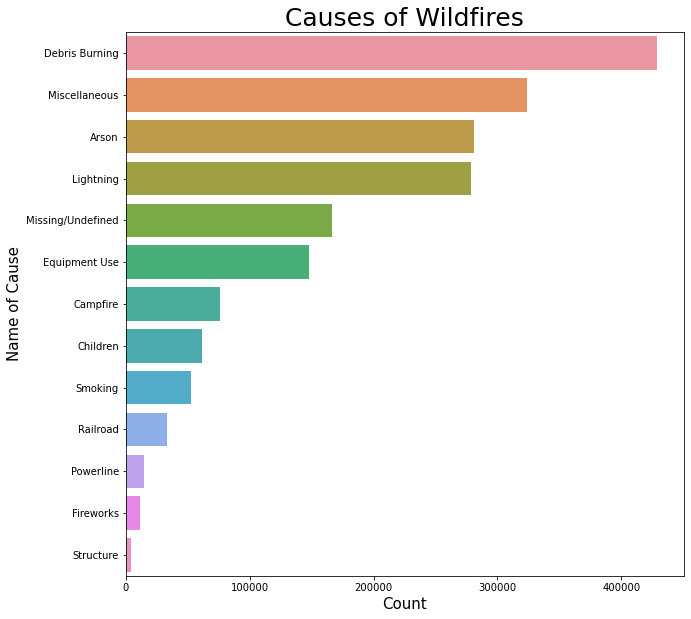

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(y=cause_count.index, x=cause_count)
plt.title('Causes of Wildfires', fontsize=25)
plt.ylabel('Name of Cause', fontsize=15)
plt.xlabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

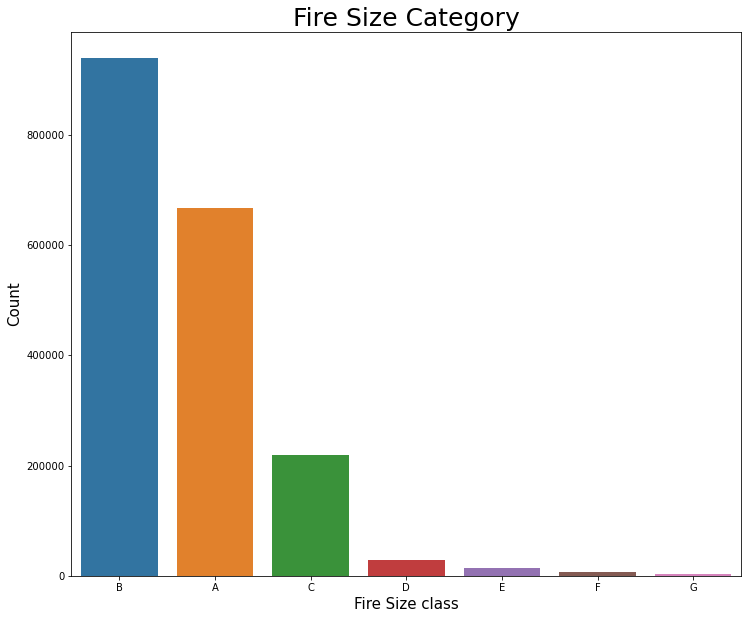

In [40]:
fire_size_df = fire_incidents[['FIRE_SIZE', 'FIRE_SIZE_CLASS','FIRE_YEAR','STATE','COUNTY','Month']]
size_count = fire_size_df['FIRE_SIZE_CLASS'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot(x=size_count.index, y=size_count)
plt.title('Fire Size Category', fontsize=25)
plt.xlabel('Fire Size class', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'COUNT')

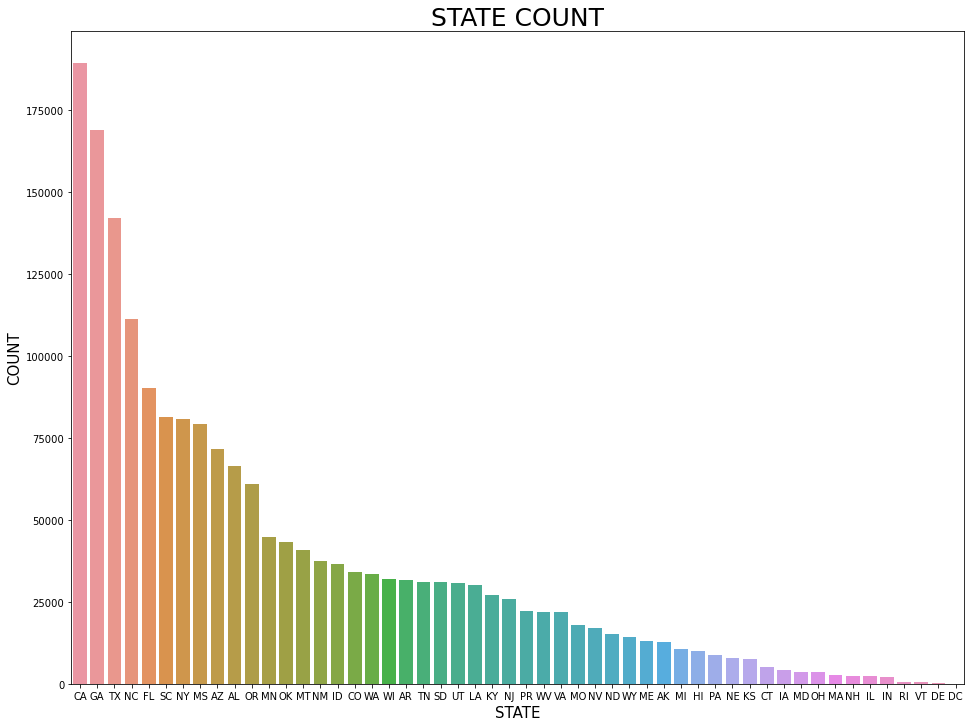

In [59]:
state_df = fire_incidents[['FIRE_SIZE', 'FIRE_SIZE_CLASS','FIRE_YEAR','STATE','COUNTY','Month']]
state_count = state_df['STATE'].value_counts()
year_count = state_df['FIRE_YEAR'].value_counts()
month_count = state_df['Month'].value_counts()
plt.figure(figsize=(16,12))
sns.barplot(x=state_count.index, y=state_count)
plt.title('STATE COUNT', fontsize=25)
plt.xlabel('STATE', fontsize=15)
plt.ylabel('COUNT', fontsize=15)

Text(0, 0.5, 'COUNT')

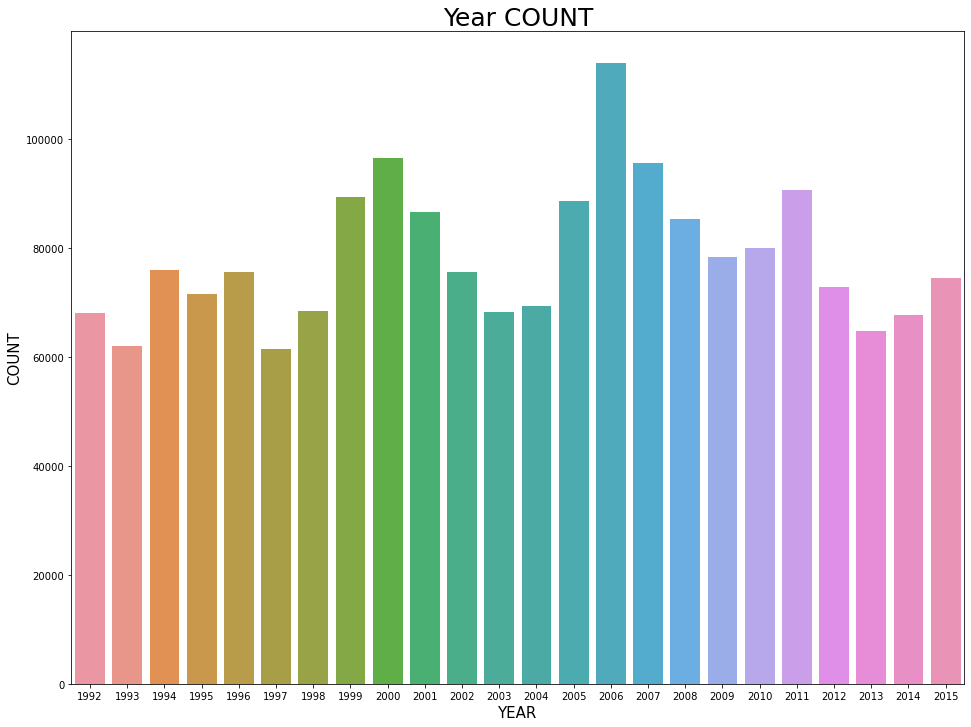

In [60]:
plt.figure(figsize=(16,12))
sns.barplot(x=year_count.index, y=year_count)
plt.title('Year COUNT', fontsize=25)
plt.xlabel('YEAR', fontsize=15)
plt.ylabel('COUNT', fontsize=15)

Text(0, 0.5, 'COUNT')

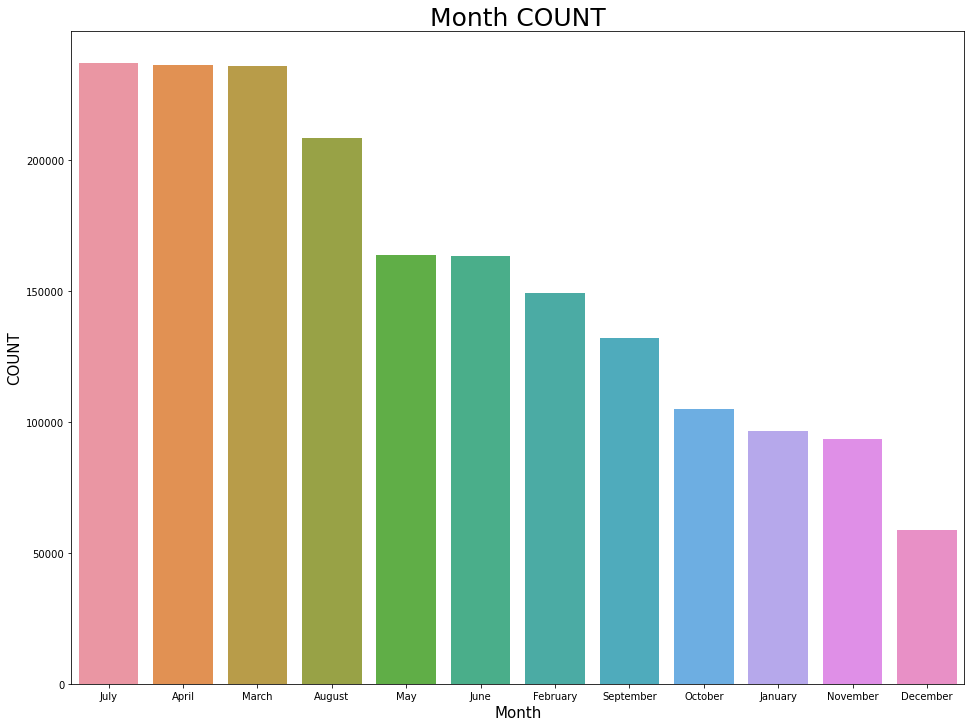

In [61]:
plt.figure(figsize=(16,12))
sns.barplot(x=month_count.index, y=month_count)
plt.title('Month COUNT', fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('COUNT', fontsize=15)

### FOLIUM

In [70]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
import pandas as pd

In [71]:
fire_stations = pd.read_csv("firestations.csv")
fire_stations.head()

,FireDepartmentId,Name,TypeId,County,PhysicalCity,PhysicalState,PhysicalZipCode,PhysicalAddress1,PhysicalAddress2,Latitude,...,CharterId,CharterType,Legacy_VFDId,TESRS,IsAssistanceOnHold,EstablishmentYear,PrimaryProtectionAreaSqMile,CreatedDate,LastVerifiedDate,LastVerifiedBy
0,711.0,2604 VFD,VFD,Hill,Whitney,TX,76692.0,319 FM 2604,NaN,32.010900,...,41347601.0,Department,2510.0,NaN,0.0,1977.0,42.0,8/14/17 15:09,12/7/20 16:48,4328.0
1,1696.0,287 R/C Fire & Rescue,Combination/Part Paid,Navarro,Corsicana,TX,75109.0,9854 S Hwy 287,NaN,31.997800,...,800321607.0,Department,4177.0,NaN,0.0,2004.0,90.0,2/2/18 16:31,9/6/22 9:37,7936.0
2,246.0,356 VFD,VFD,Trinity,Trinity,TX,75862.0,12427 FM 356,NaN,30.870400,...,64714301.0,Department,985.0,NaN,0.0,1989.0,60.0,3/15/18 15:35,5/4/22 16:19,145.0
3,1032.0,84 East VFD,Combination/Part Paid,Anderson,Palestine,TX,75801.0,2254 ACR 385,NaN,31.746636,...,58085601.0,Department,2960.0,NaN,0.0,1982.0,95.0,4/6/18 13:19,11/12/20 9:56,829.0
4,1644.0,980 North VFD,Combination/Part Paid,San Jacinto,Huntsville,TX,77320.0,30 Lakeside Drive,NaN,30.860360,...,117550401.0,Department,4004.0,NaN,0.0,1990.0,17.0,5/4/16 12:16,3/1/21 14:40,281.0


In [90]:
len(fire_stations)

3840

In [94]:
fire_stations = fire_stations.dropna(subset=['Latitude'])

In [95]:
len(fire_stations)

1840

In [89]:
pd.isna(fire_stations['Latitude'])

0       False
1       False
2       False
3       False
4       False
        ...  
3835     True
3836     True
3837     True
3838     True
3839     True
Name: Latitude, Length: 3840, dtype: bool

In [85]:
fire_stations.dtypes

FireDepartmentId                float64
Name                             object
TypeId                           object
County                           object
PhysicalCity                     object
PhysicalState                    object
PhysicalZipCode                 float64
PhysicalAddress1                 object
PhysicalAddress2                 object
Latitude                        float64
Longitude                       float64
MailAddress1                     object
MailAddress2                     object
MailCity                         object
MailState                        object
MailZipCode                     float64
Phone                           float64
Fax                             float64
Website                          object
PaidPersonnel                   float64
PartPaidPersonnel               float64
VolunteerPersonnel              float64
ActiveVolunteerPersonnel        float64
AdminStaffPersonnel             float64
VolunteerAdminStaffPersonnel    float64


In [73]:
folium.Map()

In [76]:
select_widget=ipywidgets.Select(
    options=['Open Street Map', 'Terrain', 'Toner', 'Watercolor', 'Positron', 'Dark Matter'],
    value='Open Street Map',
    description='Map Type:',
    disabled=False)

# widget function
def select(map_type):
    if map_type == 'Open Street Map':
        display(folium.Map(location=[39, -104.990337], zoom_start=12, height=500))
    if map_type == 'Terrain':
        display(folium.Map(location=[39.739192, -104.990337], tiles='Stamen Terrain', zoom_start=12, height=400))
    if map_type == 'Toner':
        display(folium.Map(location=[39.739192, -104.990337], tiles='Stamen Toner', zoom_start=12, height=400))
    if map_type == 'Watercolor':
        display(folium.Map(location=[39.739192, -104.990337], tiles='Stamen Watercolor', zoom_start=12, height=400))
    if map_type == 'Positron':
        display(folium.Map(location=[39.739192, -104.990337], tiles='CartoDB Positron', zoom_start=12, height=400))
    if map_type == 'Dark Matter':
        display(folium.Map(location=[39.739192, -104.990337], tiles='CartoDB Dark_Matter', zoom_start=12, height=400))
        
# interaction between widgets and function    
ipywidgets.interact(select, map_type=select_widget)

interactive(children=(Select(description='Map Type:', options=('Open Street Map', 'Terrain', 'Toner', 'Waterco…

<function __main__.select(map_type)>

In [133]:
# create map
map_firestations = folium.Map(location=[31, -99], zoom_start=6, height= 1000)

# plot airport locations
for (index, row) in fire_stations.iterrows():
    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']],popup=row['County'],
                  icon=folium.Icon(color='red', icon='circle', prefix='fa')).add_to(map_firestations)
    
    
# display map    
map_firestations

In [140]:
map_firestations.save("/Users/ishan/OneDrive/Desktop/map_firestations.html")